# PYTHON PROJECT

### Data description 

- the year (from 1995 to 2010)
- the states (52 in total, but for the purpose of my project, I am only interested in 4 Western states, which are California, Arizona, Montana, Utah)
- % of people who smoke every day #in range (0,1.0)
- % of people who smoke some days #in range (0,1.0)
- % of former smokers #in range (0,1.0)
- % of people who never smoke #in range (0, 1.0) 
- Location 1 (restating what state it is with specific coordinates) 




### Main question:

- My project focuses on finding out which state of the four states, California, Arizona, Montana, Utah, has the highest of average % of people who smoke every day over the period of 15 years (from 1995 to 2010). 

### Three ideas for graphs or charts that my program could produce: 
- Use computation to find the average of % people who smoke everyday (sum all the data points and divide by 15). Then plot a bar chart with average % of people who smoke every day on the y-axis, and the states on x-axis, each bar presents the average % of people who smoke everyday. The state with the highest bar answers the purpose of my project. 
- A scatterplot of the % of people who smoke everyday on y-axis and the year from 1995-2010 on a-xis. Plot all the data points of % of people who smoke everyday of the 4 states (with 4 different colors to differentiate the states) on the same graph. And use computation to find the line of the average % of people who smoke everyday and plot those lines on the plot.
- A line chart with % of people who smoke everyday on y-axis and the year from 1995-2010 on a-xis. Plot 4 different lines representing how the % of people who smoke in 4 states over the year. Mathematically finding the area under the line can tell which state has the highest average % of people who smoke everyday (the one with largest area under the line). 

I think in order to perform the mathematical equation that I intended, I will focus on the bar chart. 

### Expectation

After computation, the program will produce a bar chart with average % of people who smoke every day on the y-axis, and the states on x-axis, each bar presents the average % of people who smoke everyday. The state with the highest bar answers the purpose of my project like the image below. 



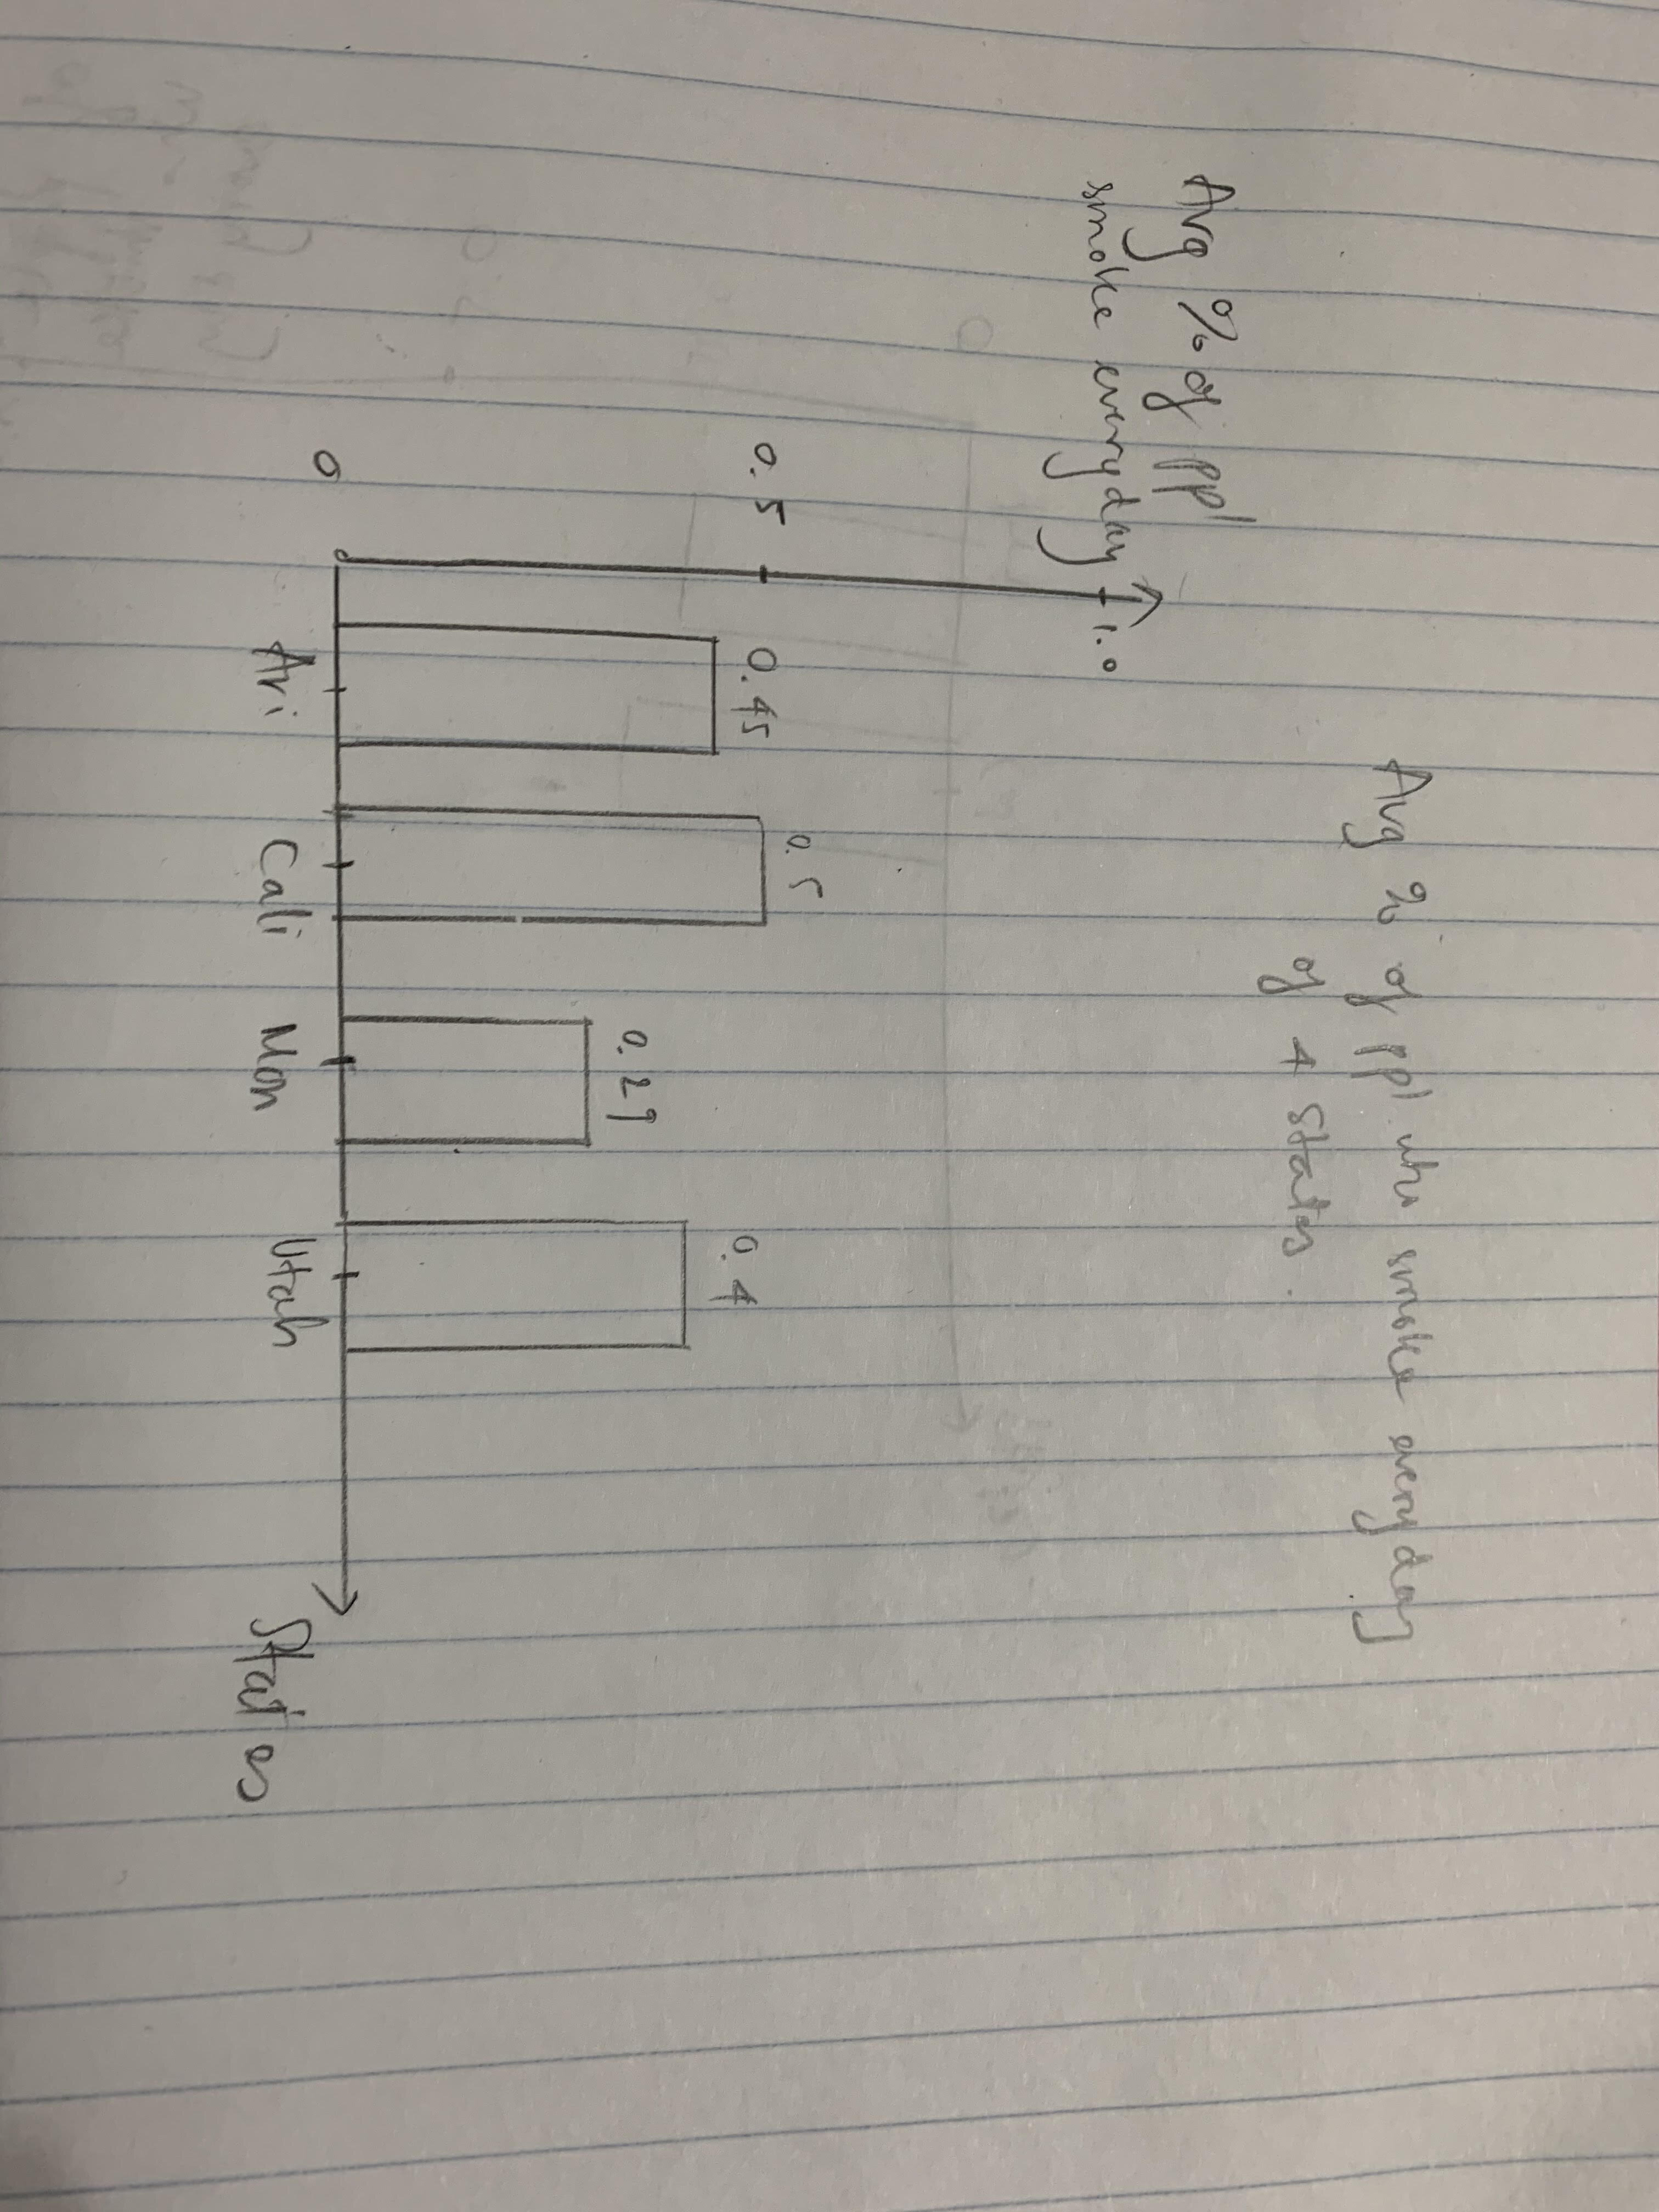



### Methods: Plan


To find out over the period of time from 1995-2010, which of the four Western states (California, Arizona, Montana, Utah) in the U.S has the highest average percentage of people who smoke everyday, the information needed to figure this out is: states, year, % of people who smoke everyday. 
Because I need to find the avg % of people who smoke everyday for each state, doing so by summing all the % 
of people who smoke everyday of each year and divide by 15.
I need to include state name and year in the data defintion so that when the calculation is performed, data point of each year will not be repeated and the data point from other states will not be included when calculating avg of a specific state. 

In [145]:
from cs103 import *
from typing import NamedTuple, List, Optional 
import csv
import matplotlib.pyplot as plt
import numpy as np 


##################
# Data Definitions

State = Optional[str] 
#interp. state name or None meaning there is no state present 
S0 = None
S1 = 'Arizona'
S2 = 'Utah'

# template based on Optional
@typecheck
def fn_for_state(s: State) -> ...:
    if s is None:
        return ...
    else:
        return ...(s)
    
TobaccoData = NamedTuple('TobaccoData', [('year', int), #in range [1995, 2010]
                                         ('state', State), #Optional[str]
                                         ('smoke_everyday', float)]) #in range [0.0, 1.0]
                                        
                                    
#interp. tobacco data in a specific year with its year (from 1995 to 2010)
#with a state name, % of people who smoke everyday (smoke_everyday)

TD1 = TobaccoData(2004, 'Utah' , 0.08)
TD2 = TobaccoData(2010, 'Arizona' , 0.11)
TD3 = TobaccoData(2000, 'California', 0.12)
TD4 = TobaccoData(1995,'Arizona', 0.2)

#template based on Compound w/ 3 fields and reference rule (once)
@typecheck 
def fn_for_tobacco_data(td: TobaccoData) -> ...: 
    return ...(td.year,
              fn_for_state(td.state),
              td.smoke_everyday)

#List[TobaccoData]
#list of tobacco data

LOTD0 = []
LOTD1 = [TD1]
LOTD2 = [TD1, TD2, TD3]
LOTD3 = [TD2, TD3, TD4]

# template based on arbitrary-sized and the reference rule
@typecheck
def fn_for_lotd (lotd: List[TobaccoData]) -> ...:
    # description of the acc
    acc = ... # type: ...
    for td in lotd:
        acc = ... (acc, fn_for_tobacco_data(td))
    return ...(acc)
        
                                         
def read(filename: str) -> List[TobaccoData]:
    """    
    reads information from the specified file and returns a list of tobacco data 
    with its year, state name, and % of people who smoke everyday for the purpose of this project
    """
    #return []  #stub
    #Template from HtDAP
    #lotd contains the result so far
    lotd = [] # type: List[TobaccoData]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            td = TobaccoData(parse_int(row[0]), parse_state(row[1]), parse_float(row[2]))
            lotd.append(td)
    
    return lotd
    
@typecheck 
def parse_state(s: Optional[str])-> State:
    '''returns the state in string type and None if there is no state  
    '''
    #return '' #stub 
    #template based on Optional 
    if s == ''or s is None:
        return None  
    else: 
        return s
    
start_testing()
expect(parse_state(''), None)
expect(parse_state(None), None)
expect(parse_state('Arizona'), 'Arizona')
expect(parse_state('Utah'), 'Utah')
summary()

# Begin testing
start_testing()

expect(read("testfile_empty1.csv"), []) 
expect(read("testfile_small.csv"), [TobaccoData(2002, 'Arizona', 0.18),
                                  TobaccoData(2004, 'Arizona', 0.14)])

expect(read("testfile_small_2.csv"), [TobaccoData(2002, 'Arizona', 0.18),
                                  TobaccoData(2004, 'Arizona', 0.14),
                                  TobaccoData(1998, 'California', 0.14),
                                  TobaccoData(2009, 'California', 0.08),
                                  TobaccoData(1997, 'Montana', 0.18),
                                  TobaccoData(2000, 'Utah', 0.1)])
# show testing summary
summary()

4 of 4 tests passed
3 of 3 tests passed


### Functions to read the information and store it as data in the program and to analyze the data


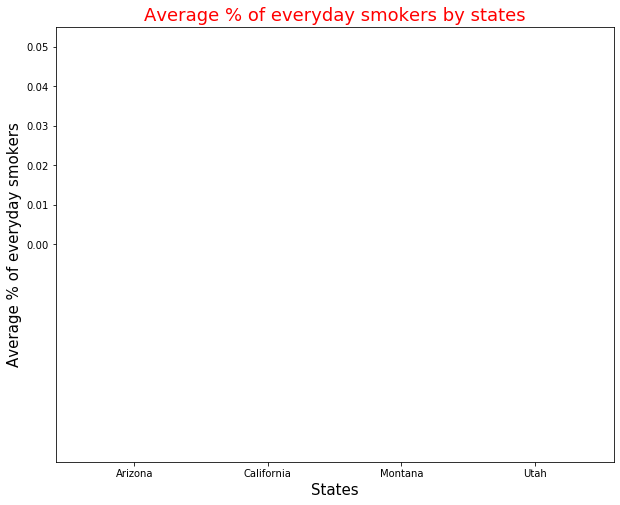

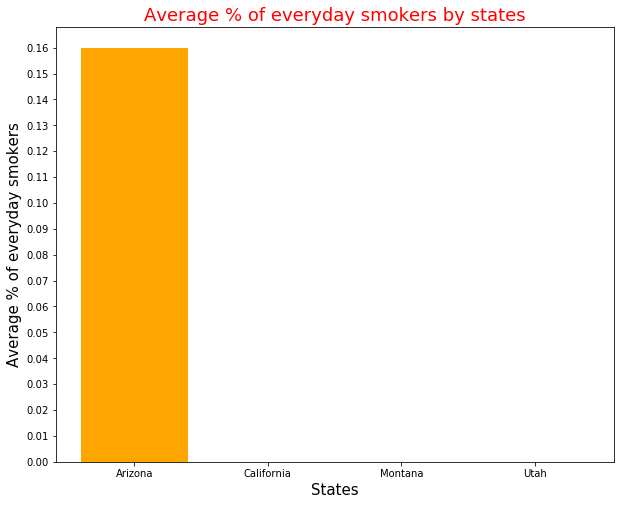

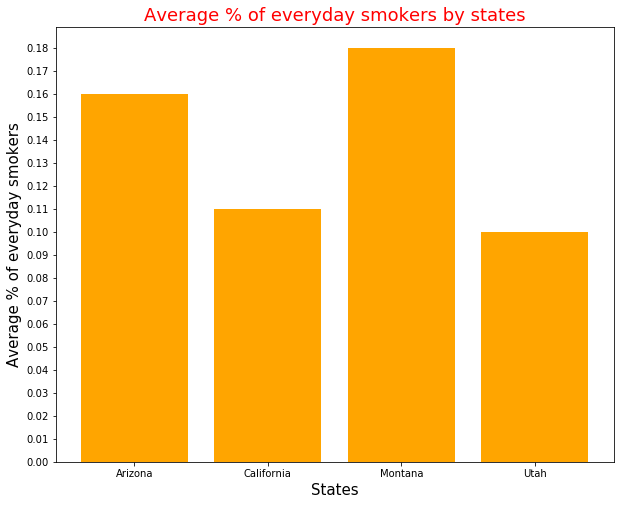

3 of 3 tests passed
4 of 4 tests passed
3 of 3 tests passed


In [146]:
###########
# Functions

#main function
@typecheck
def main(filename: str) -> None: 
    """
    Reads the file from given filename, analyzes the data and returns a bar chart showing
    average % of everyday smokers of 4 states on y-axis and the 4 states (Arizona, California, Montana, Utah)
    on x-aixs. The average % is defined to be 0 if there are no everyday smoker of that state in the file.  
    """
    #return None #stub 
    # Template from HtDAP, based on function composition 
    plt.figure(figsize=(10,8))
    x_val = ["Arizona", "California", "Montana", "Utah"]
    x_pos = np.arange(len(x_val))
    
    y_val_Ari = avg_smoke_everyday(read(filename),"Arizona")
    y_val_Cal = avg_smoke_everyday(read(filename),"California")
    y_val_Mon = avg_smoke_everyday(read(filename),"Montana")
    y_val_Utah = avg_smoke_everyday(read(filename),"Utah")
    y_val = [y_val_Ari, y_val_Cal, y_val_Mon, y_val_Utah] #list of y-values 
    
    plt.xlabel('States', fontdict={'fontsize': 15})
    plt.ylabel('Average % of everyday smokers',fontdict={'fontsize': 15})
    plt.title('Average % of everyday smokers by states', fontdict={'color': 'red','fontsize': 18})
    plt.yticks(np.arange(0.000, 0.200, step=0.010))  
    plt.xticks(x_pos, x_val)
    plt.bar(x_pos, y_val, facecolor ='orange')
    plt.show()
    return None 
    
#find the list of % of people who smoke everyday for each state 
#helper function 
def find_list_smoke_everyday(lotd: List[TobaccoData], s: str) -> List[float]: 
    '''takes a list of tobacco data and a given state, 
    find the list of % of people who smoke everyday for that given state 
    '''
    #template based on List[TobaccoData] 
    #smoke_everyday is the list of % of people who smoke everyday for each year of given state seen so far 
    #Assumes that no data of any years is repeated 
    list_smoke_everyday = [] #type: List[float]
    for td in lotd: 
        if td.state == s: 
            list_smoke_everyday.append(td.smoke_everyday)
    return list_smoke_everyday 


#find the average % of people who smoke everyday for given state 
#analyze function 
def avg_smoke_everyday(lotd: List[TobaccoData], s: str)-> float: 
    '''takes a list of tobacco data and a given state, 
    find the average % of people who smoke everyday for that given state'''
    #return 0.0 #stub
    #return ... #template based on atomic distinct value 
    avg = 0 
    if len(find_list_smoke_everyday(lotd,s)) == 0: 
        return avg   
    else: 
        avg = sum(find_list_smoke_everyday(lotd,s))/len(find_list_smoke_everyday(lotd,s))
    return avg 

# Examples and tests for main function 
start_testing()
expect(main("testfile_empty1.csv"), None)
expect(main("testfile_small.csv"), None)
expect(main('testfile_small_2.csv'), None)
summary()

# Examples and tests for analyze function
start_testing()
expect(avg_smoke_everyday([],'Arizona'), 0.0) 
expect(avg_smoke_everyday([TobaccoData(2002, 'Arizona', 0.18),
                            TobaccoData(2004, 'Arizona', 0.14)], 'Arizona'), 0.16) 
expect(avg_smoke_everyday([TobaccoData(2002, 'Arizona', 0.18),
                                  TobaccoData(2004, 'Arizona', 0.14),
                                  TobaccoData(1998, 'California', 0.14),
                                  TobaccoData(2009, 'California', 0.08),
                                  TobaccoData(1997, 'Montana', 0.18),
                                  TobaccoData(2000, 'Utah', 0.1)], "Utah"), 0.1) 
expect(avg_smoke_everyday([TobaccoData(2002, 'Arizona', 0.18),
                                  TobaccoData(2004, 'Arizona', 0.14),
                                  TobaccoData(1998, 'California', 0.14),
                                  TobaccoData(2009, 'California', 0.08),
                                  TobaccoData(1997, 'Montana', 0.18),
                                  TobaccoData(2000, 'Utah', 0.1)], "California"), 0.11) 

summary()

#Examples and tests for helper functions 
start_testing()
expect(find_list_smoke_everyday([],'Arizona'), []) 
expect(find_list_smoke_everyday([TobaccoData(2002, 'Arizona', 0.18),
                                  TobaccoData(2004, 'Arizona', 0.14)], 'Arizona'), [0.18, 0.14])
expect(find_list_smoke_everyday([TobaccoData(2002, 'Arizona', 0.18),
                                  TobaccoData(2004, 'Arizona', 0.14),
                                  TobaccoData(1998, 'California', 0.14),
                                  TobaccoData(2009, 'California', 0.08),
                                  TobaccoData(1997, 'Montana', 0.18),
                                  TobaccoData(2000, 'Utah', 0.1)], "Utah"), [0.1]) 
summary()

### Final Graph/Chart



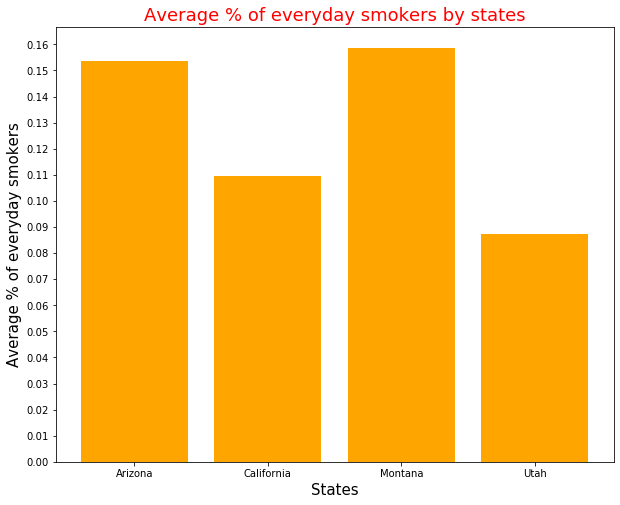

In [147]:
main("tobacco.csv")

### Conclusion: 

> We can see from the graph that Montana is the state that has the highest percentage of daily smokers among the 4 states (1995-2010). 

In [148]:
# Be sure to select ALL THE FILES YOU NEED (including csv's) 
# when you submit. As usual, you cannot edit this cell.
# Instead, run this cell to start the submission process.
from cs103 import submit

COURSE = 35980
ASSIGNMENT = 420474  # final submission
submit(COURSE, ASSIGNMENT)

# If your submission fails, SUBMIT ANYWAY by downloading your files and uploading them to Canvas.
# You can learn how on the page "How to submit your Jupyter notebook" on our Canvas site.

Valid(value=True, description='Token')

SelectMultiple(description='Files', index=(0,), options=('project_milestone_template.ipynb', 'project_final_su…

Button(description='submit', icon='check', style=ButtonStyle(), tooltip='submit')

[NbConvertApp] Converting notebook project_final_submission_template.ipynb to html
[NbConvertApp] Executing notebook with kernel: python3
[NbConvertApp] ERROR | Error while converting 'project_final_submission_template.ipynb'
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/nbconvert/nbconvertapp.py", line 410, in export_single_notebook
    output, resources = self.exporter.from_filename(notebook_filename, resources=resources)
  File "/opt/conda/lib/python3.7/site-packages/nbconvert/exporters/exporter.py", line 179, in from_filename
    return self.from_file(f, resources=resources, **kw)
  File "/opt/conda/lib/python3.7/site-packages/nbconvert/exporters/exporter.py", line 197, in from_file
    return self.from_notebook_node(nbformat.read(file_stream, as_version=4), resources=resources, **kw)
  File "/opt/conda/lib/python3.7/site-packages/nbconvert/exporters/html.py", line 95, in from_notebook_node
    return super(HTMLExporter, self).from_notebook_node(